In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from  cooler_extended import  CoolerExtended

In [22]:
filepath = 'data/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool'
bases_in_bin = 500000 #for resolution 500kb - 500000
chr_number = "2" #number of interested chromosome or "X"
c = CoolerExtended(filepath)
sv_master_table = pd.read_csv("result.csv",delimiter = "\t")

D:\Study\scientific\cooler_extended.py:13: RuntimeWarning: Mean of empty slice
  averages_at_dist = [np.nanmean(distribution_at_dist(arr, d)) for d in range(0, n)]
D:\Study\scientific\cooler_extended.py:17: RuntimeWarning: invalid value encountered in double_scalars
  ans[i, j] = arr[i, j] / averages_at_dist[abs(i - j)]


In [42]:
#getting normilized hiс matrix by chromosome
matrix = c.hic_matrices_normalized["chr"+chr_number]

#getting SVs
sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]
sv_bins_x = []
sv_bins_y = []
for i in sv_for_chr["start1"].tolist():
        sv_bins_x.append(i//bases_in_bin)
for i in sv_for_chr["start2"].tolist():
        sv_bins_y.append(i//bases_in_bin)

C:\Users\vit\AppData\Local\Temp/ipykernel_9736/327701047.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]


C:\Users\vit\AppData\Local\Temp/ipykernel_9736/851114743.py:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(matrix), cmap='YlOrRd')


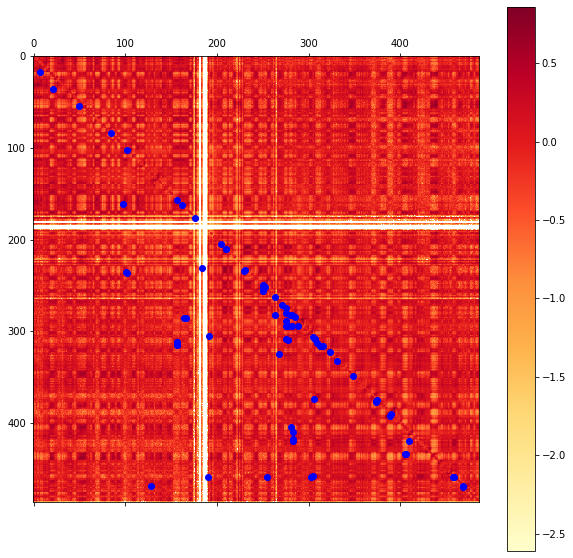

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix), cmap='YlOrRd')
fig.colorbar(im)
plt.scatter(sv_bins_x,sv_bins_y,c="blue")
plt.show()
